In [74]:
import glob,os
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import scipy.io as sio
%matplotlib inline

<h2>Loading images scores 

In [2]:
pathhome = os.getcwd()
# Path to CNN outcomes
pathcnn = pathhome +'\\outcome\\imagenet_vgg_f\\fc7'

In [62]:
# Function getting image scores from processed matfiles
def getscore(matfile):
    data = sio.loadmat(pathcnn+'\\test\\'+matfile)
    word_data = []
    for d in data['data']:
        word = d[0][0][0][2]
        word = str(word[0])
        words = word.split(',')
        #print(str(words[0]))
        word_data.append(words[0])
    del data
    return word_data

In [83]:
# Extracting all scores from train images
word_data_train = []
for f in os.listdir(pathcnn+"\\train"):
    word_data = getscore(f)
    word_data_train.append(' '.join(word_data))
texttrain = ' '.join(word_data_train)

In [85]:
# Extracting all scores from test images
word_data_test = []
for f in os.listdir(pathcnn+"\\test"):
    word_data = getscore(f)
    word_data_test.append(' '.join(word_data))
texttest = ' '.join(word_data_test)

In [90]:
# Text file from test and train images scores
textboth = ' '.join([texttest, texttrain])

<h2> Generating word cloud images

In [91]:
def generatecloud(text):
    wordcloud = WordCloud(max_font_size=80, relative_scaling=.5).generate(text)
    plt.figure(figsize = (10,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    return

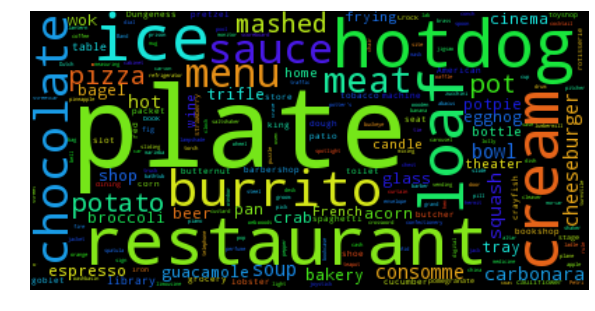

In [93]:
generatecloud(textboth)

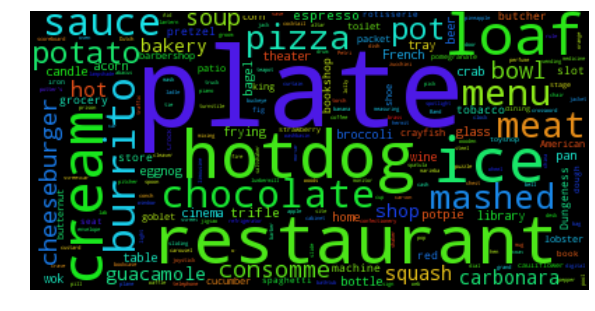

In [94]:
generatecloud(texttrain)

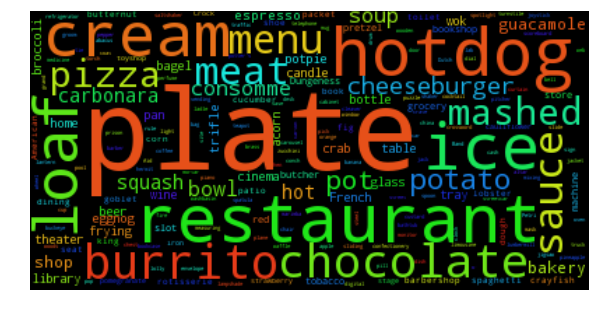

In [95]:
generatecloud(texttest)